Training the neural network...
Cost after iteration 0: 0.8304824192704133
Cost after iteration 100: 0.2495571421648615
Cost after iteration 200: 0.13551622271565836
Cost after iteration 300: 0.09761185213297857
Cost after iteration 400: 0.07721073567500372
Cost after iteration 500: 0.06448041122660798
Cost after iteration 600: 0.056694279377848676
Cost after iteration 700: 0.05091074442643369
Cost after iteration 800: 0.046394249901928634
Cost after iteration 900: 0.042803496925897695
Cost after iteration 1000: 0.039823280744657186
Cost after iteration 1100: 0.03729693357380047
Cost after iteration 1200: 0.0351149696396523
Cost after iteration 1300: 0.033213807924042625
Cost after iteration 1400: 0.0315379503768079
Cost after iteration 1500: 0.030048413338455378
Cost after iteration 1600: 0.028709296121195882
Cost after iteration 1700: 0.027493367437900013
Cost after iteration 1800: 0.026376769994099984
Cost after iteration 1900: 0.025297192625669263
Cost after iteration 2000: 0.024305

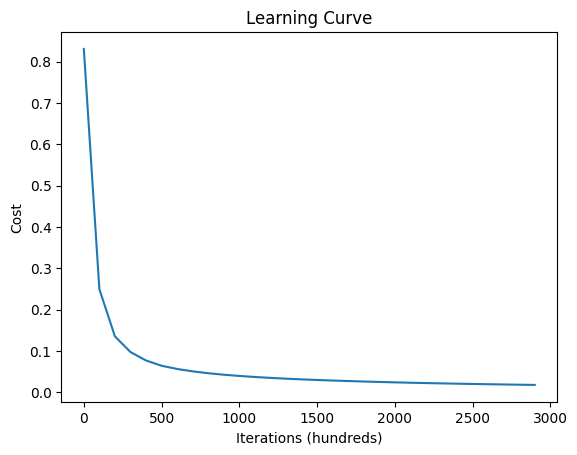

Accuracy: 99.75%


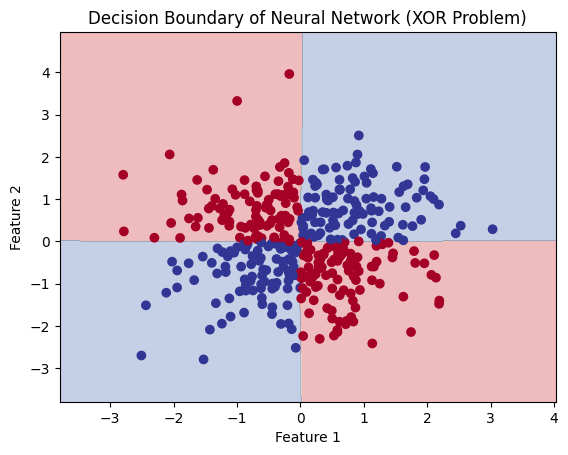

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class DeepNeuralNetwork:
    def __init__(self, layer_dims):
        # Initialize parameters with He initialization
        self.parameters = {}
        self.L = len(layer_dims) - 1
        for l in range(1, self.L + 1):
            self.parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2. / layer_dims[l-1])
            self.parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        return (Z > 0).astype(float)

    def sigmoid(self, Z):
        Z = np.clip(Z, -500, 500)  # Prevent overflow
        return 1 / (1 + np.exp(-Z))

    def sigmoid_derivative(self, Z):
        s = self.sigmoid(Z)
        return s * (1 - s)

    def forward_propagation(self, X):
        A = X
        caches = []
        for l in range(1, self.L):
            Z = np.dot(self.parameters['W' + str(l)], A) + self.parameters['b' + str(l)]
            A = self.relu(Z)
            caches.append((A, Z))
        ZL = np.dot(self.parameters['W' + str(self.L)], A) + self.parameters['b' + str(self.L)]
        AL = self.sigmoid(ZL)
        caches.append((AL, ZL))
        return AL, caches

    def compute_cost(self, AL, Y):
        m = Y.shape[1]
        epsilon = 1e-15
        AL = np.clip(AL, epsilon, 1 - epsilon)  # Prevent log(0)
        cost = -1 / m * np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL))
        return cost

    def backward_propagation(self, X, Y, caches):
        grads = {}
        m = X.shape[1]
        L = self.L
        AL, ZL = caches[-1]
        dAL = -(np.divide(Y, AL + 1e-15) - np.divide(1 - Y, 1 - AL + 1e-15))
        dZL = dAL * self.sigmoid_derivative(ZL)
        A_prev = caches[-2][0] if L > 1 else X
        grads['dW' + str(L)] = 1/m * np.dot(dZL, A_prev.T)
        grads['db' + str(L)] = 1/m * np.sum(dZL, axis=1, keepdims=True)
        dA_prev = np.dot(self.parameters['W' + str(L)].T, dZL)

        for l in reversed(range(1, L)):
            A, Z = caches[l - 1]
            A_prev = caches[l - 2][0] if l > 1 else X
            dZ = dA_prev * self.relu_derivative(Z)
            grads['dW' + str(l)] = 1/m * np.dot(dZ, A_prev.T)
            grads['db' + str(l)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
            dA_prev = np.dot(self.parameters['W' + str(l)].T, dZ)

        return grads

    def train(self, X, Y, learning_rate=0.01, num_iterations=3000, print_cost=True):
        costs = []
        beta = 0.9
        self.velocity = {}
        for l in range(1, self.L + 1):
            self.velocity['dW' + str(l)] = np.zeros_like(self.parameters['W' + str(l)])
            self.velocity['db' + str(l)] = np.zeros_like(self.parameters['b' + str(l)])

        for i in range(num_iterations):
            AL, caches = self.forward_propagation(X)
            cost = self.compute_cost(AL, Y)
            grads = self.backward_propagation(X, Y, caches)

            for l in range(1, self.L + 1):
                self.velocity['dW' + str(l)] = beta * self.velocity['dW' + str(l)] + (1 - beta) * grads['dW' + str(l)]
                self.velocity['db' + str(l)] = beta * self.velocity['db' + str(l)] + (1 - beta) * grads['db' + str(l)]
                self.parameters['W' + str(l)] -= learning_rate * self.velocity['dW' + str(l)]
                self.parameters['b' + str(l)] -= learning_rate * self.velocity['db' + str(l)]

            if print_cost and i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")
                costs.append(cost)

        return costs

    def predict(self, X):
        AL, _ = self.forward_propagation(X)
        predictions = (AL > 0.5).astype(int)
        return predictions

# Test the neural network with XOR problem
np.random.seed(1)
X = np.random.randn(2, 400)
Y = (X[0, :] * X[1, :] > 0).astype(int).reshape(1, -1)

# Create neural network with improved architecture
layer_dims = [2, 10, 5, 1]  # 2 input features, 2 hidden layers (10 and 5 neurons), 1 output
dnn = DeepNeuralNetwork(layer_dims)

print("Training the neural network...")
costs = dnn.train(X, Y, learning_rate=0.1, num_iterations=3000, print_cost=True)

# Plot learning curve
plt.plot(np.arange(0, 3000, 100), costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (hundreds)')
plt.title('Learning Curve')
plt.show()

# Calculate and display accuracy
predictions = dnn.predict(X)
accuracy = np.mean(predictions == Y)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Visualize the decision boundary
h = 0.01
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()].T
Z = dnn.predict(grid)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
plt.scatter(X[0, :], X[1, :], c=Y.flatten(), cmap=plt.cm.RdYlBu)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary of Neural Network (XOR Problem)")
plt.show()
